In [33]:
import pandas as pd
import csv
import sys
import re
import numpy
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/expression_matrix.csv", header=None)
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/columns_metadata.csv")
GeneCol["Period"] = GeneCol.apply(lambda row: TemporalMap(row["age"])[0], axis=1)
GeneCol["Description"] = GeneCol.apply(lambda row: TemporalMap(row["age"])[1], axis=1)
GeneDat = [GeneExp, GeneRow, GeneCol]

In [45]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
AllRegions = [ 'URL', 'OFC', 'MGE', 'PCx', 'VFC', 'LGE', 'M1C-S1C', 'DTH', 'HIP', 'Ocx', 'CGE', 'ITC', 'AMY', 'DFC',
 'STC', 'MFC', 'TCx', 'STR', 'IPC', 'V1C','S1C', 'A1C', 'M1C', 'CB', 'CBC', 'MD']

In [5]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/Autism_LGD.csv"
AssignVar2Gene(GeneRow, VarFile)
print GeneRow.head(2)
GeneRow_withVar = GeneRow[GeneRow["Vars"]!=""]
print GeneRow_withVar.head(2)
GeneRow_withVar.shape

17603   row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id Vars
0        1     9633  ENSG00000101337      TM9SF4       9777     
1        2    22692  ENSG00000114650        SCAP      22937     
     row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id  \
261      262     9187  ENSG00000100815      TRIP11       9321   
305      306     5332  ENSG00000164050      PLXNB1       5364   

                       Vars  
261  ;c.3993del1;c.3993del1  
305             ;c.4334del1  


(184, 6)

In [40]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/nn.3907-S3.xlsx"
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
df = pd.read_excel(VarFile, sheetname="Proband SNVs")
df["gene_symbol"] = df.apply(lambda row: row["Gene"].split(":")[0], axis=1)
df.head()
#print df.drop_duplicates("Effect type")
Effect_type = ["nonsense", "splice_site", "frame-shift", "splice-site", "Splice_Site", "Frameshift", "frameshift",
              "splice"]
Effect_genes = list(df[df["Effect type"].isin(Effect_type)]["gene_symbol"])
Effect_GeneRow = GeneRow[GeneRow["gene_symbol"].isin(Effect_genes)]
Effect_GeneRow.shape

(88, 5)

Loading Genes 87

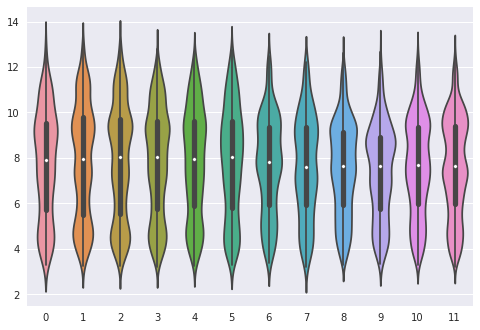

In [48]:
Genes = list(Effect_GeneRow["gene_symbol"])
DisplayGeneSumExpViolin(Genes, GeneDat, Regionsgt20)

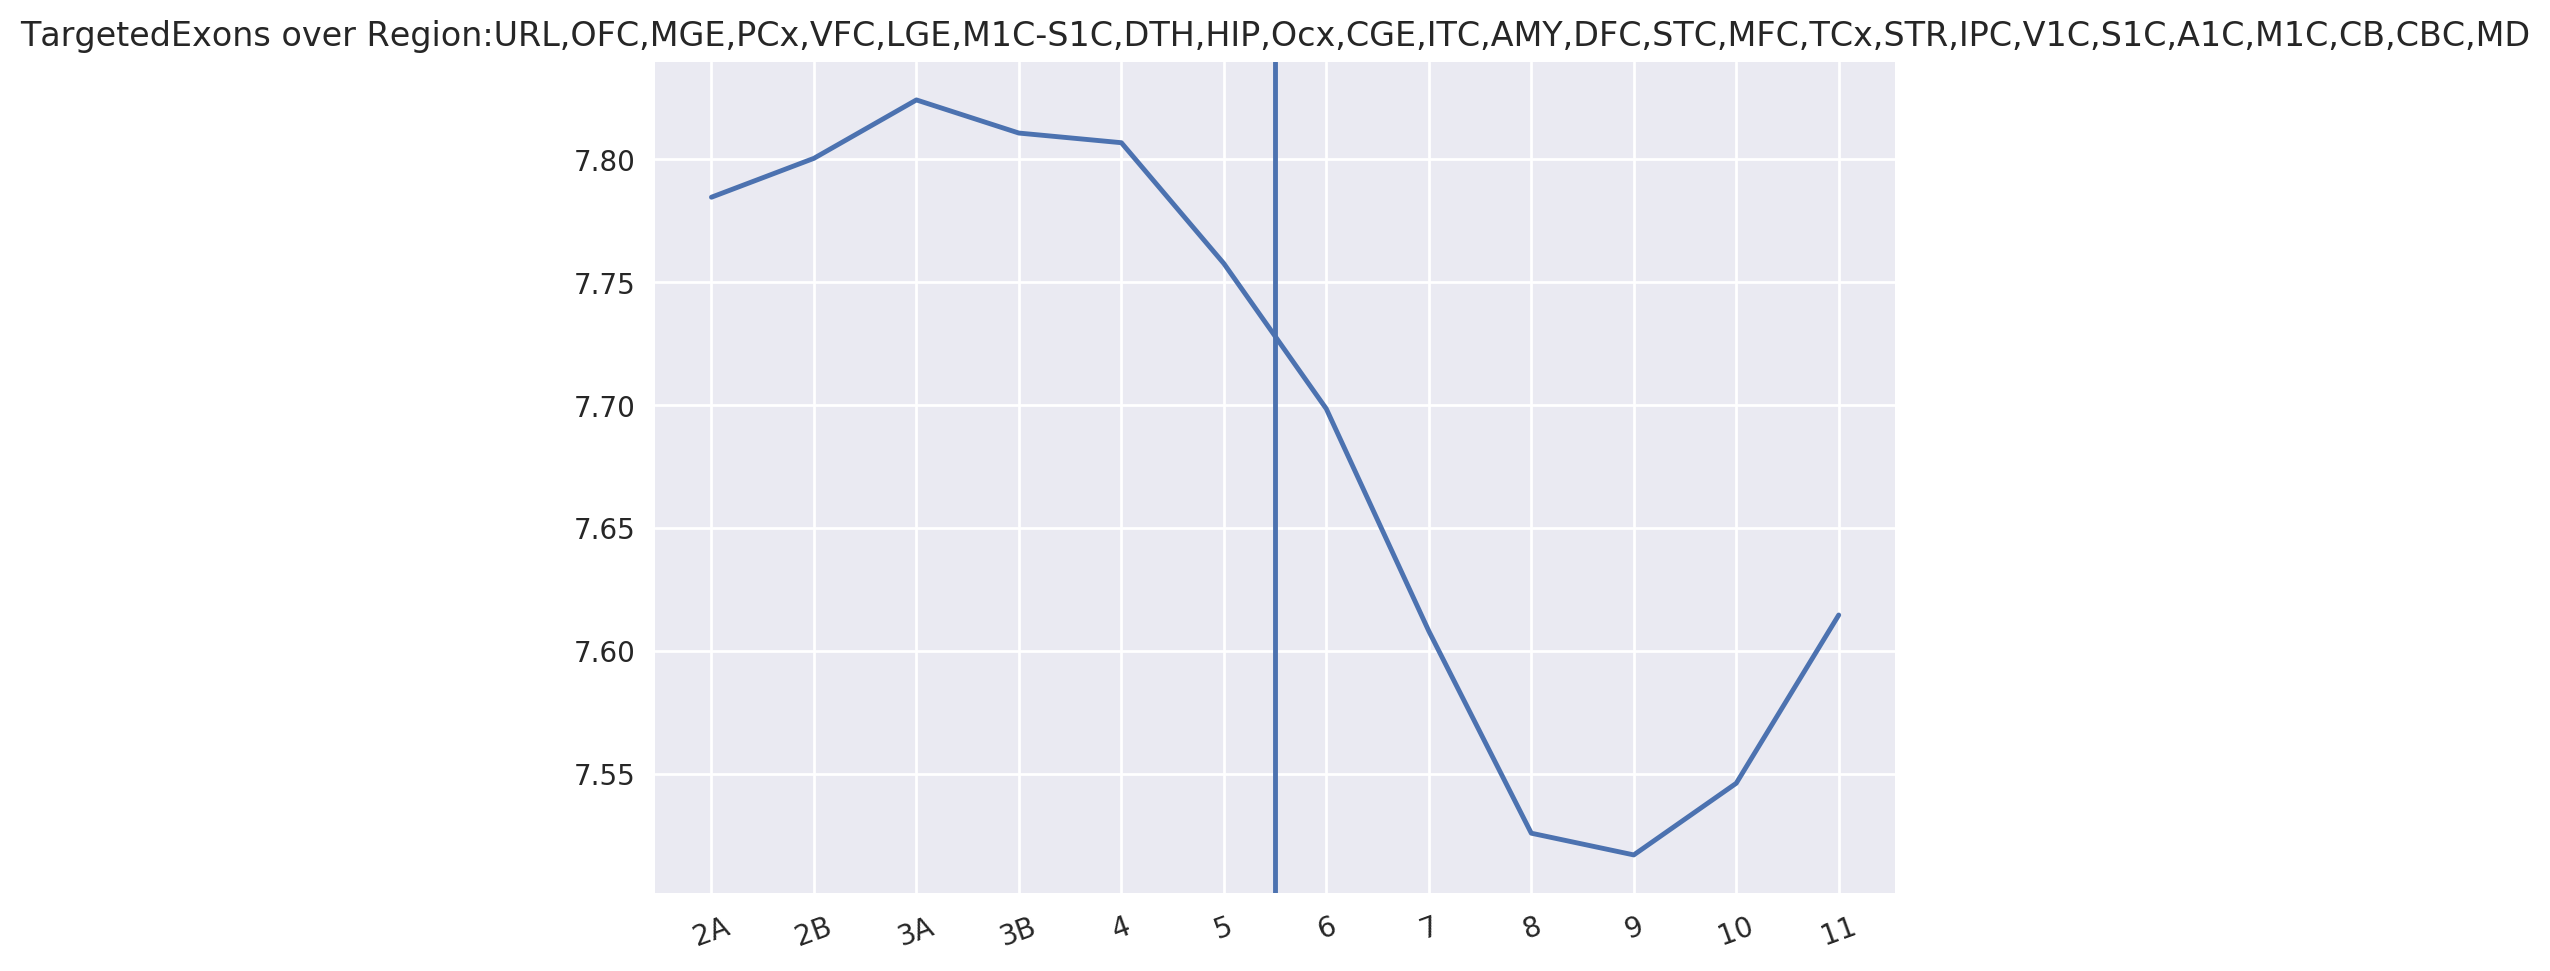

In [46]:
LookALLMutationTargetedGenes(Genes, AllRegions, GeneDat)

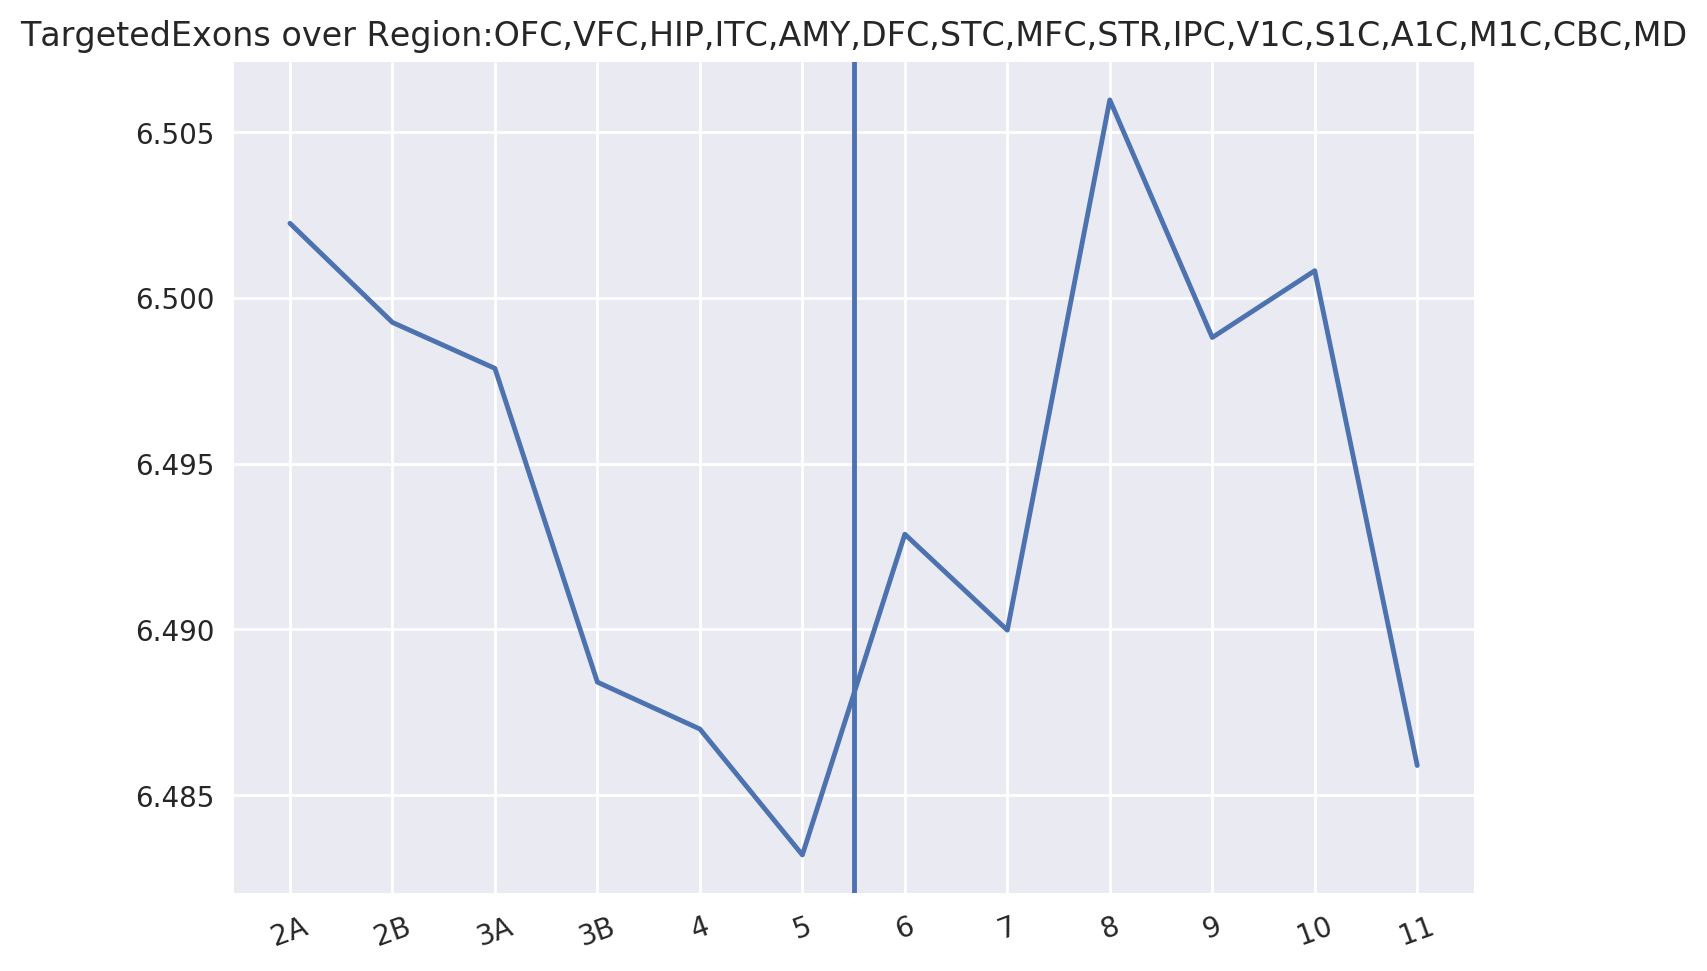

In [28]:
RamdonGenes = GeneRow.sample(1000)["gene_symbol"]
LookALLMutationTargetedGenes(RamdonGenes, Regionsgt20, GeneDat)

2B


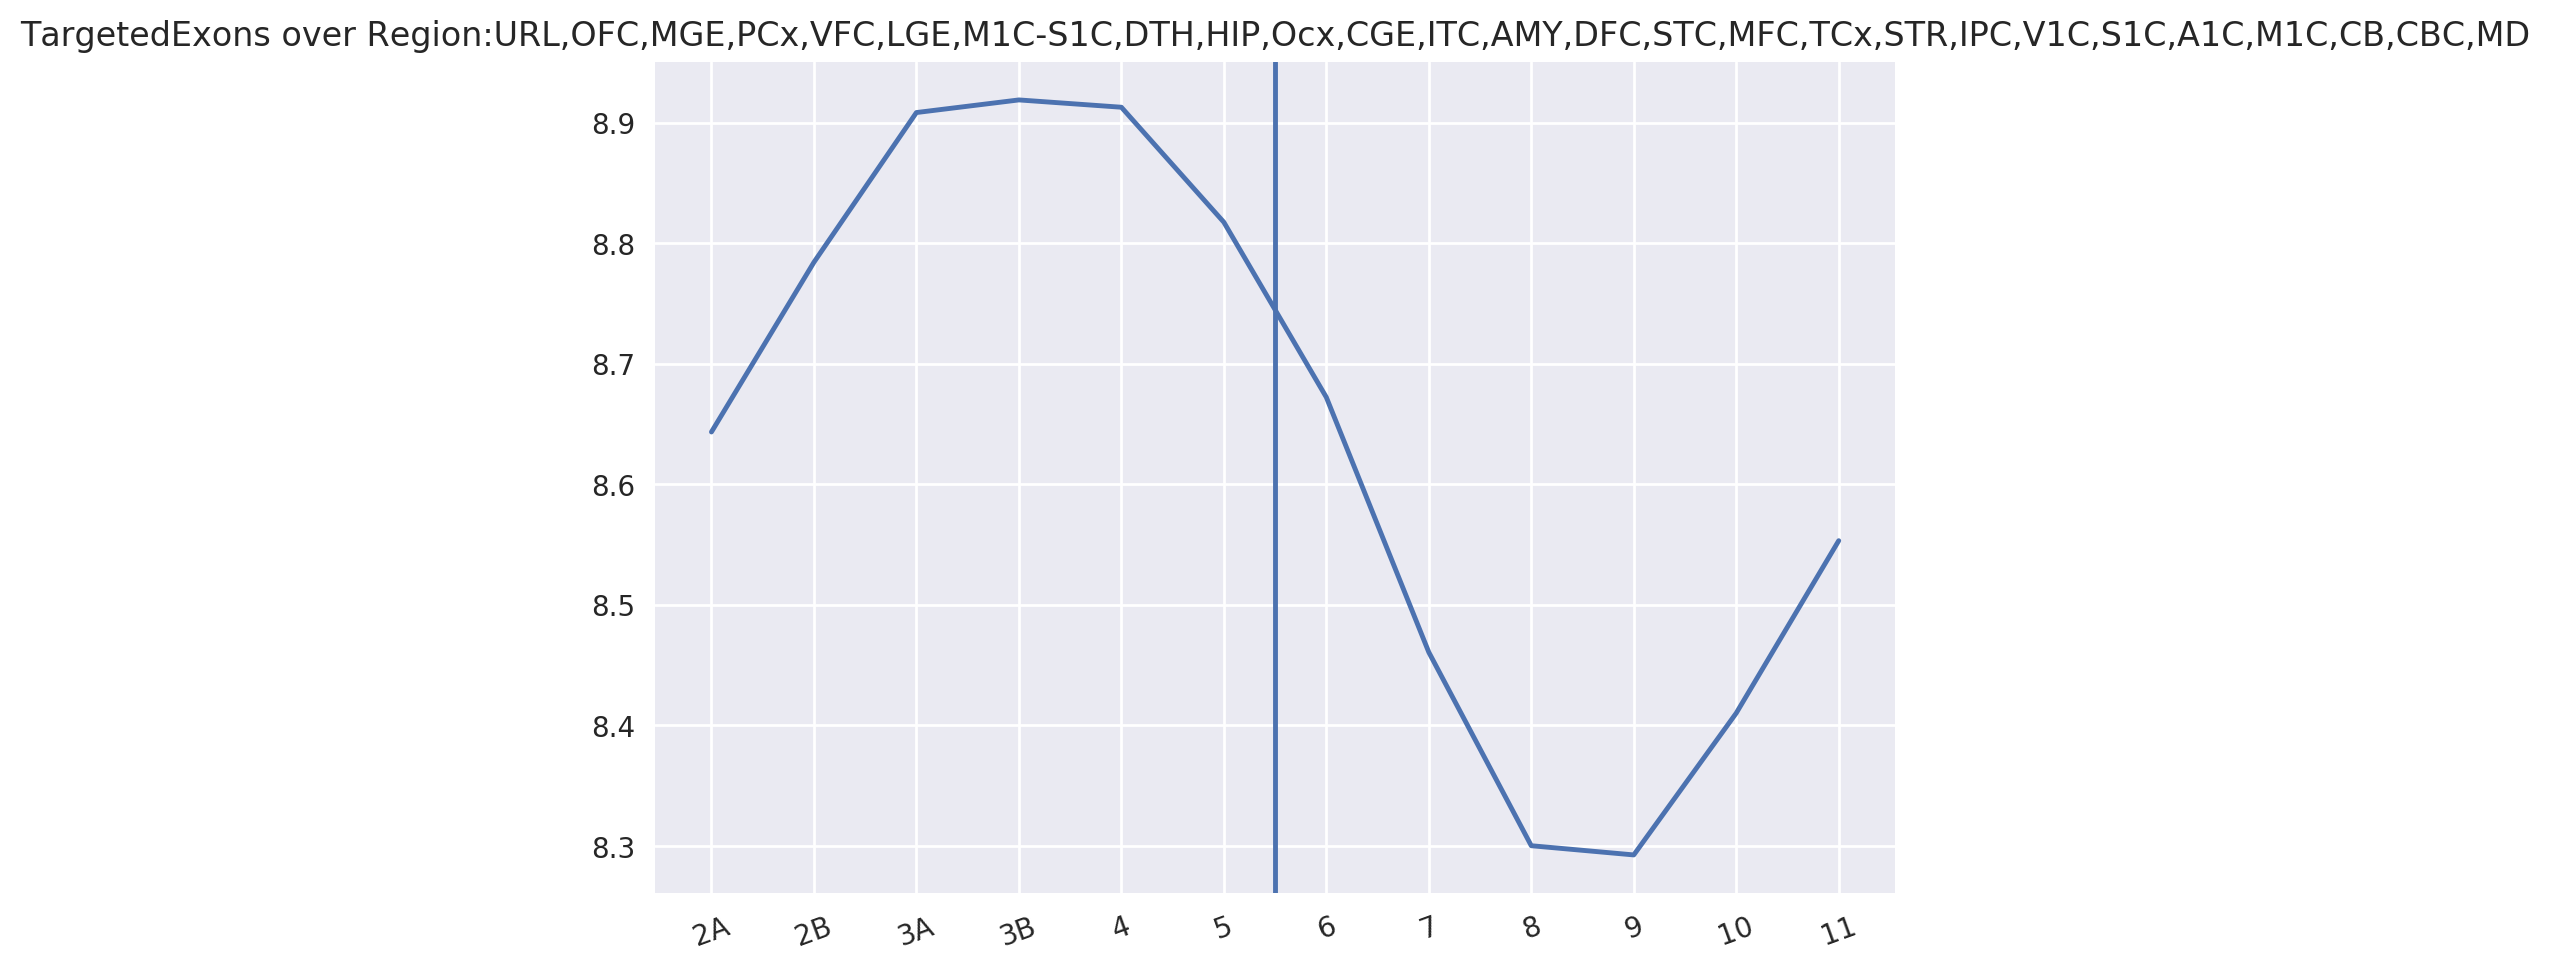

2A
6
7
9


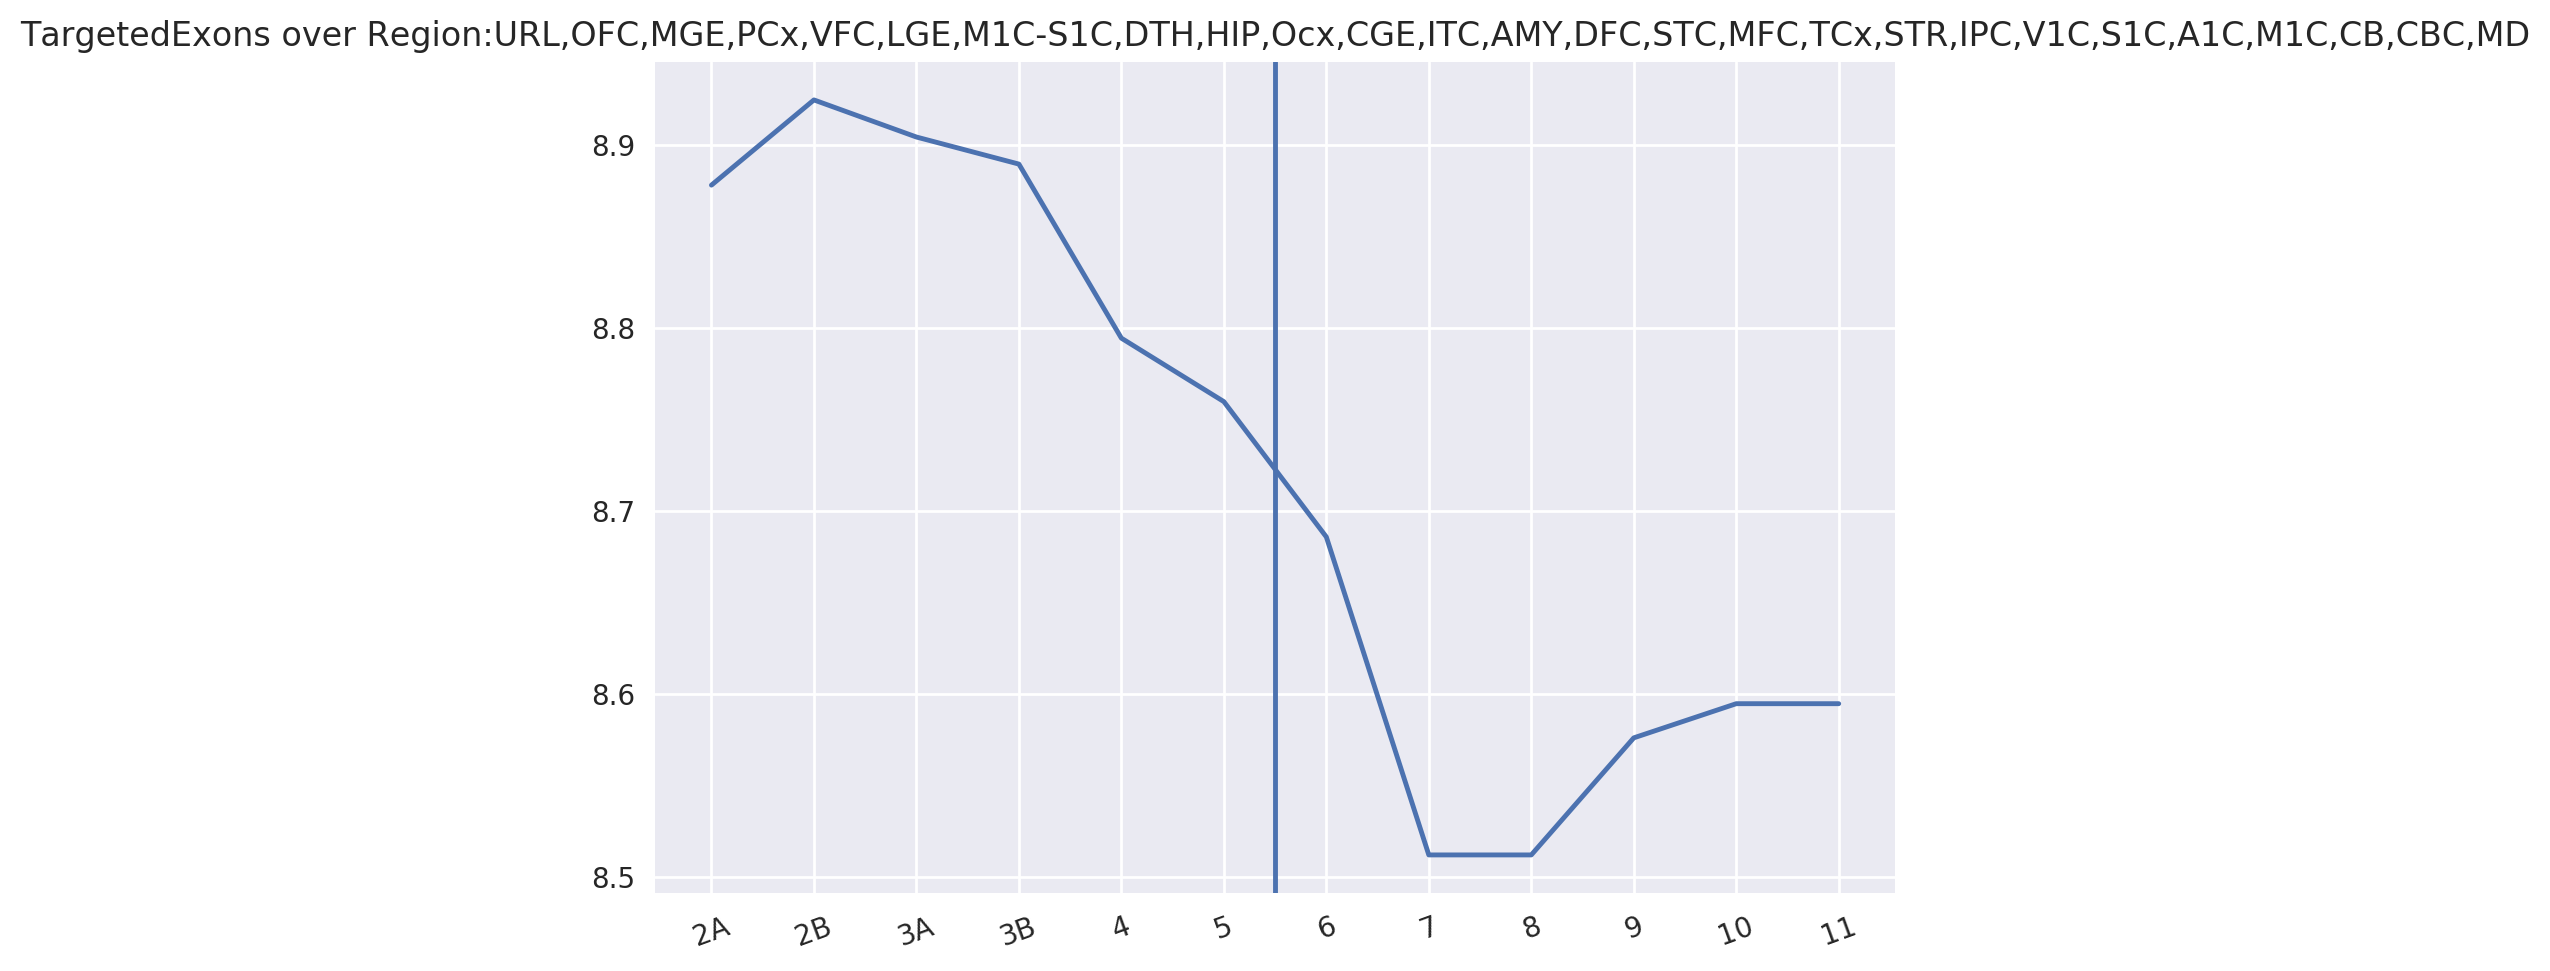

In [47]:
M_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="F"]
LookALLMutationTargetedGenes(Genes, AllRegions, (GeneExp, GeneRow_withVar, M_bp_gene_col_meta))
LookALLMutationTargetedGenes(Genes, AllRegions, (GeneExp, GeneRow_withVar, F_bp_gene_col_meta))

In [ ]:
M_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="F"]

In [23]:
M_bp_gene_col_meta.drop_duplicates("donor_id").groupby("Period").count()["donor_id"]

Period
10    2
11    3
2A    2
3A    2
3B    3
4     1
5     1
6     1
7     1
8     2
9     1
Name: donor_id, dtype: int64

In [24]:
F_bp_gene_col_meta.drop_duplicates("donor_id").groupby("Period").count()["donor_id"]

Period
10    1
11    3
2B    3
3A    1
3B    1
4     2
5     2
8     3
Name: donor_id, dtype: int64

# HBT DATA

In [28]:
ins = HBT_DATA()

In [67]:
ins.extract_matrix_table("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_series_matrix.txt",
                       "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_exp_matrix.txt")
ins.extract_col_info("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_series_matrix.txt",
                    "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_columns_metadata.csv")
ins.extract_row_info("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219_family.soft",
                    "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_rows_metadata.csv",
                    "GPL5175")

In [38]:
GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_exp_matrix.txt",
                      index_col="ID_REF", delimiter="\t")
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_rows_metadata.csv",
                     index_col="ID")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_columns_metadata.csv")

In [39]:
GeneExp.head()

,GSM703914,GSM703915,GSM703916,GSM703917,GSM703918,GSM703919,GSM703920,GSM703921,GSM703922,GSM703923,...,GSM705277,GSM705278,GSM705279,GSM705280,GSM705281,GSM705282,GSM705283,GSM705284,GSM705285,GSM705286
ID_REF,,,,,,,,,,,,,,,,,,,,,
2315554,6.51949,6.19527,5.82233,6.15533,6.11070,6.31911,5.65379,6.30666,6.40959,6.44860,...,6.54860,5.97351,6.22294,6.64395,6.66575,6.04553,6.04370,6.50627,5.94026,6.33543
2315633,7.28289,7.68305,6.64229,7.55538,7.15634,7.73684,7.45431,7.61537,6.88408,7.51926,...,7.11187,6.88476,7.23907,7.18465,7.63103,6.46638,6.94653,7.33027,7.09098,7.00755
2315674,5.78650,5.44462,5.50665,5.83645,5.42284,5.75245,5.43049,5.84820,5.67976,5.81860,...,5.88649,5.92889,5.78329,5.93186,5.84242,6.13550,5.77832,5.99664,6.00163,5.94873
2315739,6.08580,6.18029,5.56690,6.10089,6.25135,6.16108,5.41307,6.15584,6.50321,6.35714,...,6.95536,6.57457,6.79922,6.31002,6.79757,6.79250,6.33735,7.17542,6.76592,7.22542
2315894,6.25325,6.04638,6.33970,6.41998,5.61124,5.93543,5.73595,6.08590,6.01713,6.71080,...,6.02439,5.75919,5.50933,5.99726,5.66286,5.13729,5.51690,5.72321,5.81320,6.14363


In [40]:
ID_REFs = set(list(GeneExp.index))

In [74]:
GeneCol.head(2)
Regions = list(set(list(GeneCol["region"])))
print Regions
print sorted(list(set(list(GeneCol["stage"]))))

['M1C', 'DTH', 'A1C', 'DIE', 'M1C&S1C', 'VFC', 'FC', 'V1C', 'HIP', 'MFC', 'STC', 'CGE', 'AMY', 'PC', 'TC', 'OFC', 'VF', 'IPC', 'URL', 'STR', 'S1C', 'MD', 'DFC', 'CBC', 'MGE', 'OC', 'ITC', 'LGE']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [42]:
GeneExp.get_value(2315894, "GSM703918")

5.6112400000000004

In [59]:
def extract_gene(row):
    try:
        return row["gene_assignment"].split("//")[1].strip()
    except:
        return "---"
GeneRow = GeneRow[GeneRow.index.isin(ID_REFs)]
GeneRow["gene_symbol"] = GeneRow.apply(lambda row: extract_gene(row), axis=1)

In [48]:
GeneRow.loc[2315894,:]
GeneDat = [GeneExp, GeneRow, GeneCol]

In [45]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/nn.3907-S3.xlsx"
df = pd.read_excel(VarFile, sheetname="Proband SNVs")
df["gene_symbol"] = df.apply(lambda row: row["Gene"].split(":")[0], axis=1)
df.head()
#print df.drop_duplicates("Effect type")
Effect_type = ["nonsense", "splice_site", "frame-shift", "splice-site", "Splice_Site", "Frameshift", "frameshift",
              "splice"]
Effect_genes = list(df[df["Effect type"].isin(Effect_type)]["gene_symbol"])
Effect_GeneRow = GeneRow[GeneRow["gene_symbol"].isin(Effect_genes)]
Effect_GeneRow.shape

(73, 12)

In [ ]:
#VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/Autism_LGD.csv"
#AssignVar2Gene(GeneRow, VarFile)
#print GeneRow.head(2)
#GeneRow_withVar = GeneRow[GeneRow["Vars"]!=""]
#print GeneRow_withVar.head(2)
#GeneRow_withVar.shape

In [47]:
GeneRow.head()

,GB_LIST,SPOT_ID,seqname,RANGE_GB,RANGE_STRAND,RANGE_START,RANGE_STOP,total_probes,gene_assignment,mrna_assignment,category,gene_symbol
ID,,,,,,,,,,,,
2315554,"NM_001130045,NM_153254,NR_029834,NR_029639,NR_...",chr1:1095869-1135910,chr1,NC_000001.10,+,1095869,1135910,259,NM_001130045 // TTLL10 // tubulin tyrosine lig...,NM_001130045 // RefSeq // Homo sapiens tubulin...,main\n,TTLL10
2315633,"NM_080605,BC015549",chr1:1165740-1170393,chr1,NC_000001.10,+,1165740,1170393,48,NM_080605 // B3GALT6 // UDP-Gal:betaGal beta 1...,NM_080605 // RefSeq // Homo sapiens UDP-Gal:be...,main\n,B3GALT6
2315674,"NM_001130413,NM_002978,AK127357",chr1:1206658-1227386,chr1,NC_000001.10,+,1206658,1227386,225,"NM_001130413 // SCNN1D // sodium channel, nonv...",NM_001130413 // RefSeq // Homo sapiens sodium ...,main\n,SCNN1D
2315739,"NM_153339,NM_017871,BC034304",chr1:1243987-1247168,chr1,NC_000001.10,+,1243987,1247168,77,NM_153339 // PUSL1 // pseudouridylate synthase...,NM_153339 // RefSeq // Homo sapiens pseudourid...,main\n,PUSL1
2315894,"NM_022834,NM_199121,BC059409,AK291557",chr1:1370261-1378258,chr1,NC_000001.10,+,1370261,1378258,89,NM_022834 // VWA1 // von Willebrand factor A d...,NM_022834 // RefSeq // Homo sapiens von Willeb...,main\n,VWA1


72[7.3114002900886375, 7.7134055091324205, 7.8620197731624692, 7.8420431774523696, 7.811081825982237, 7.8390644542407451, 7.6231695955642529, 7.6495571729452045, 7.6316812769909443, 7.5286668433591428, 7.6000285583822569, 7.6225513934813423, 7.6474029881693655, 7.5932376606954683, 7.5388335086168805]


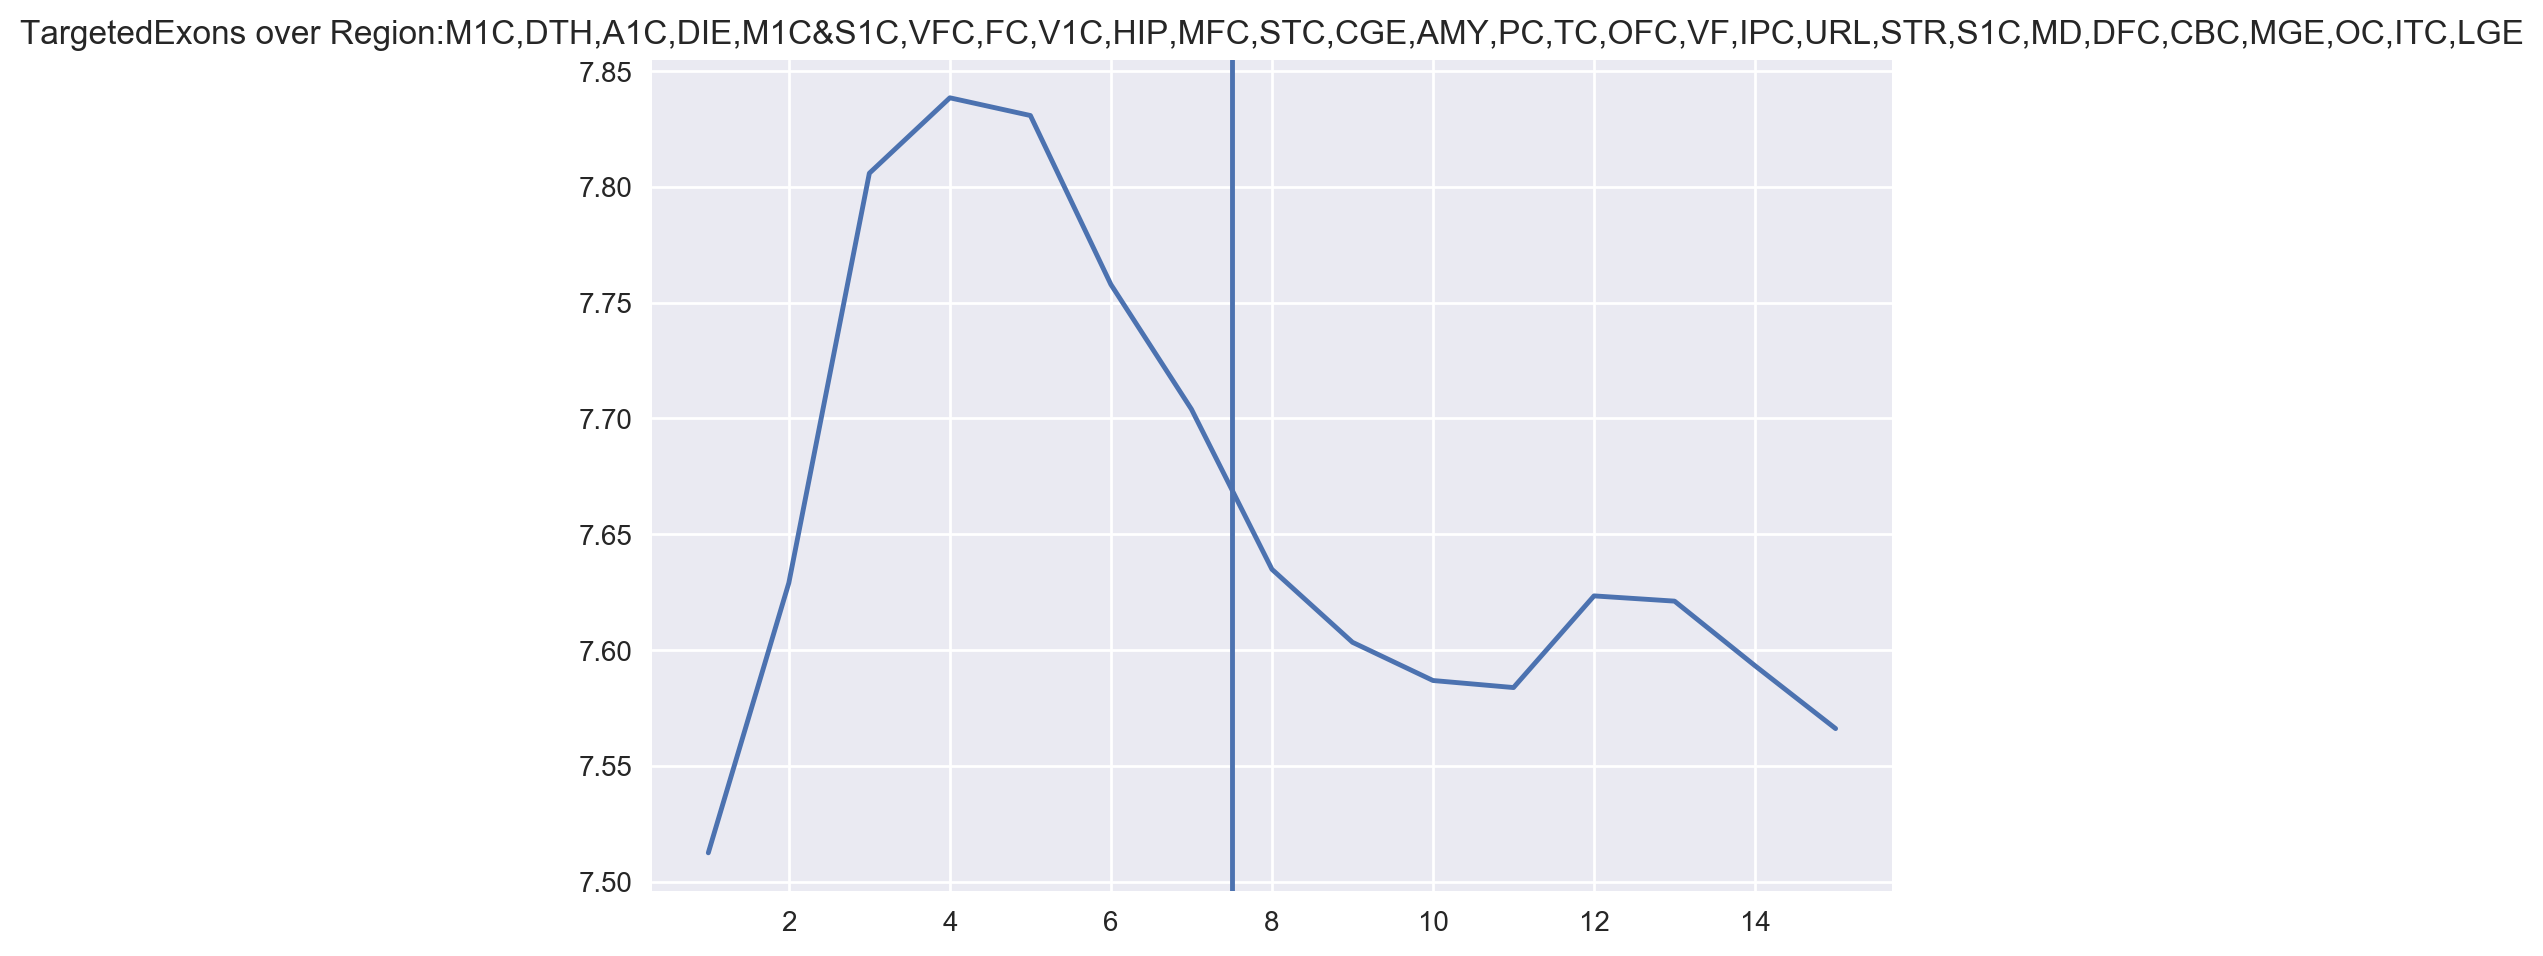

In [86]:
Genes = list(Effect_GeneRow["gene_symbol"])
#DisplayGeneSumExpViolin(Genes, GeneDat, Regions)
ins = HBT_DATA()
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, GeneDat)

72[7.3114002900886375, 7.7134055091324205, 0, 7.8273167759295497, 7.8087537203739954, 7.8895916855270993, 7.5541460821917807, 7.6495571729452045, 7.649264470734745, 7.4716466036844595, 7.5548642465753435, 7.5635334380220511, 7.6712375444694336, 7.5925868830002257, 7.607643073630137]


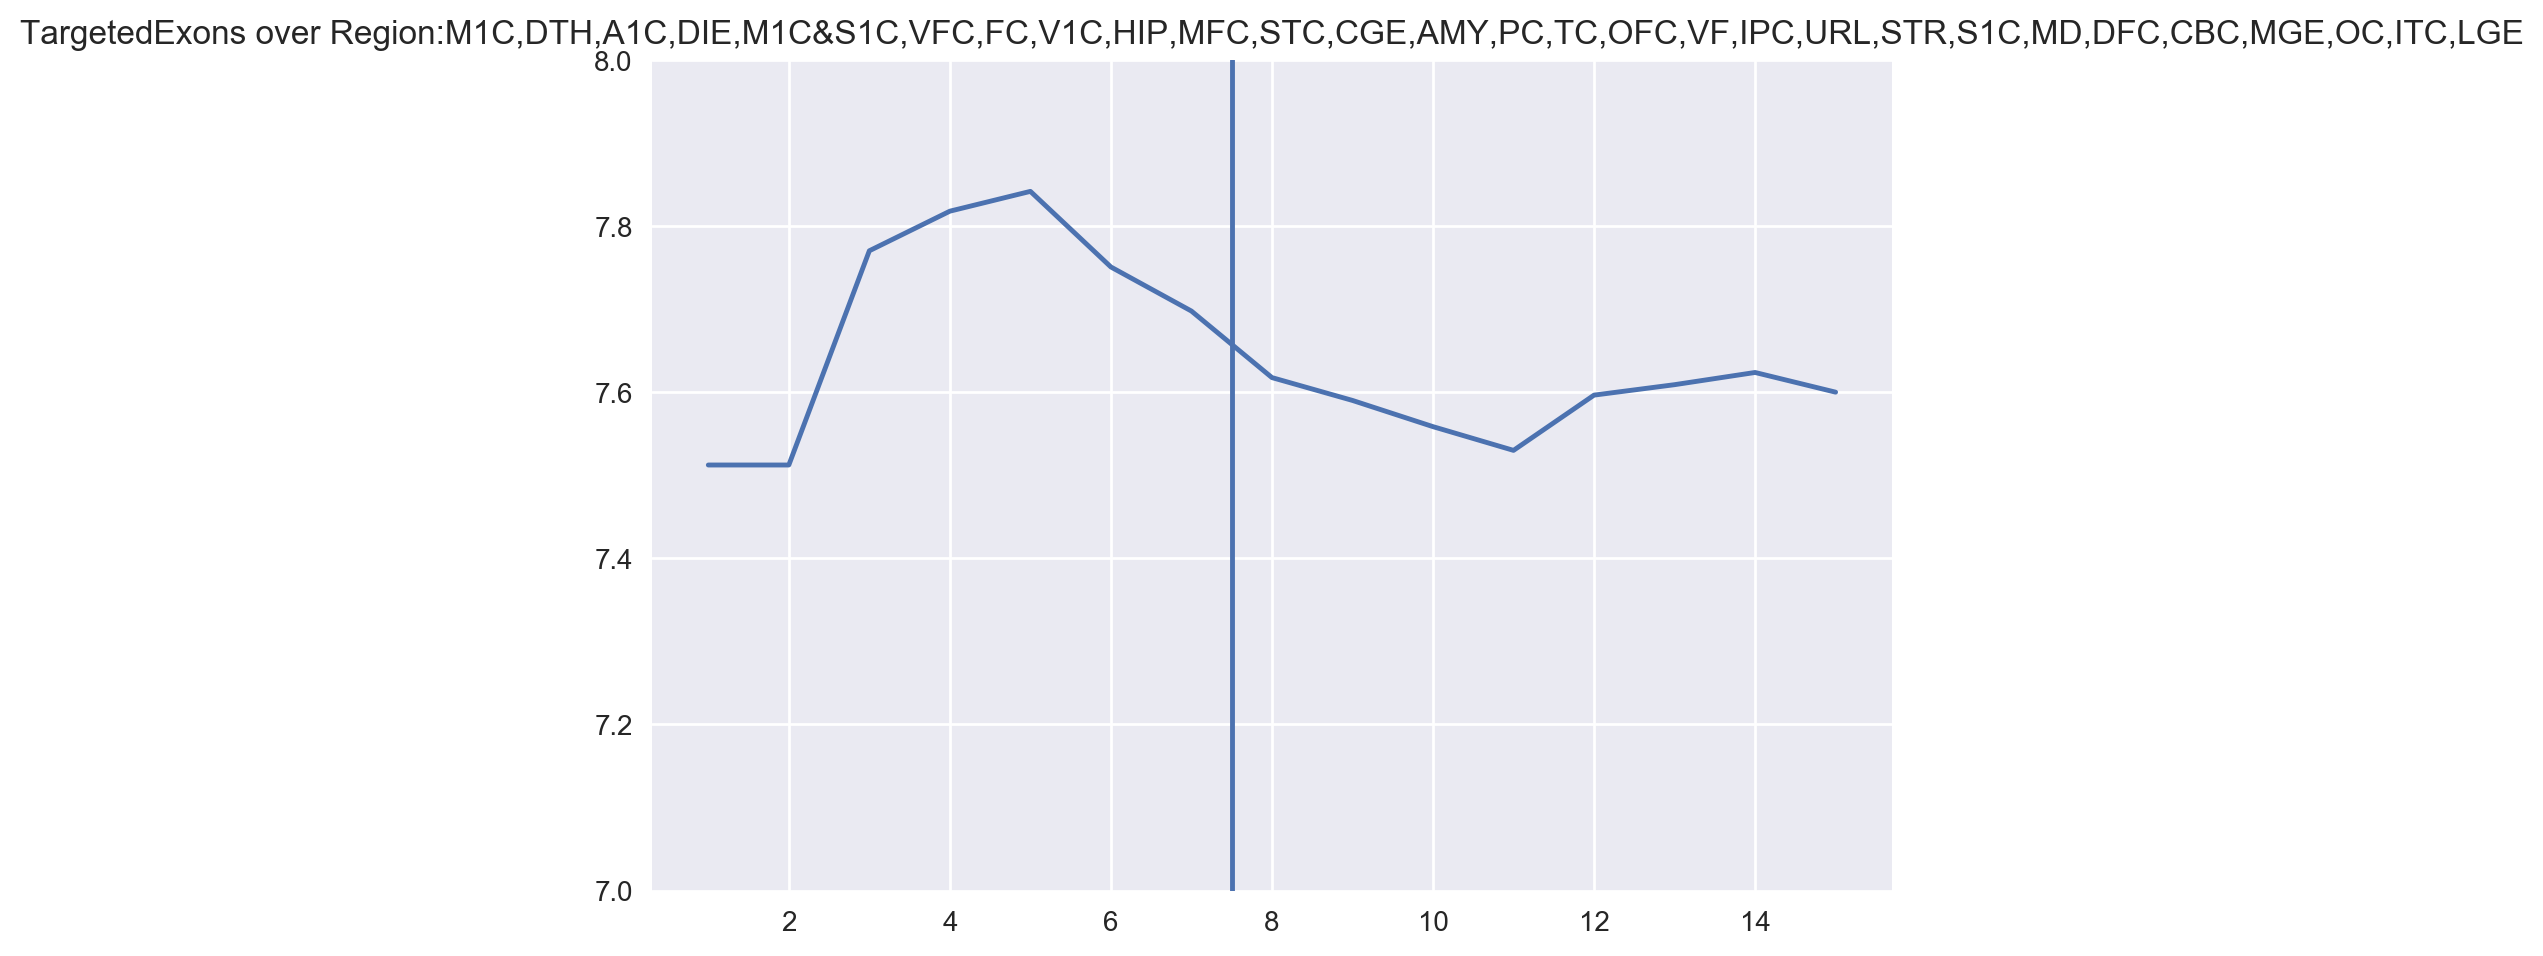

72[0, 0, 7.8620197731624692, 7.8686457092355298, 7.8163200636007835, 7.8226964779085471, 7.6859182440846832, 0, 7.6276517950913245, 7.5700065171232884, 7.6903571819960863, 7.6751543537820126, 7.610265423701815, 7.594560908675799, 7.5027366876263191]
Three 0 data at stage 1


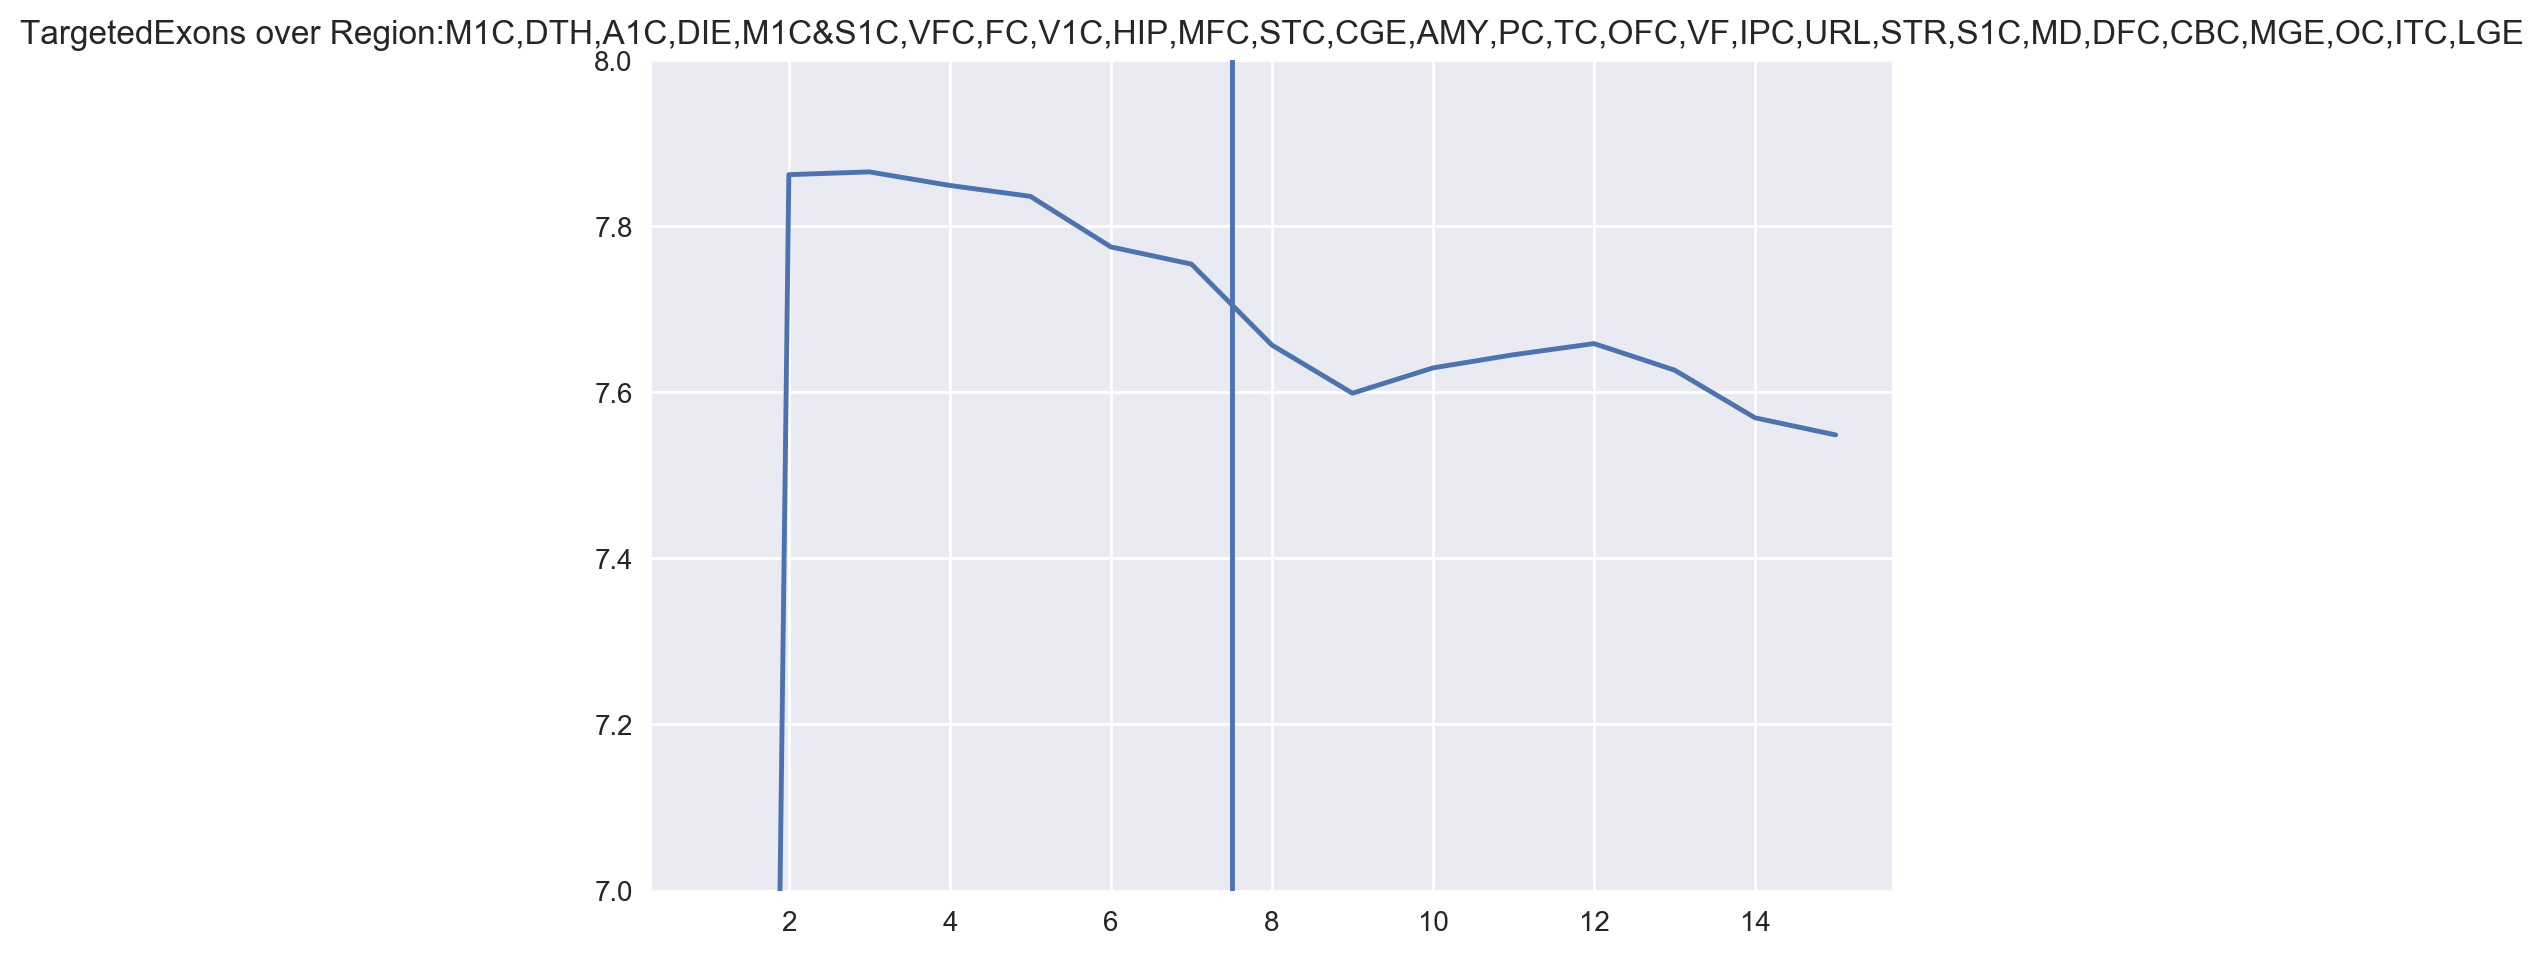

In [90]:
M_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="F"]
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, (GeneExp, Effect_GeneRow, M_bp_gene_col_meta), ylim=(7.4, 8))
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, (GeneExp, Effect_GeneRow, F_bp_gene_col_meta), ylim=(7.4, 8))

In [89]:
print set(F_bp_gene_col_meta["stage"])

set([3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15])


In [105]:
rec_lgd_entrez_id = [x.strip() for x in file("/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler-rec-lgd.txt")]
print rec_lgd_entrez_id 
bs_GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
rec_lgd_gene_symbols = list(bs_GeneRow[bs_GeneRow["entrez_id"].isin(rec_lgd_entrez_id)]["gene_symbol"])
print len(rec_lgd_gene_symbols), rec_lgd_gene_symbols

['23126', '10765', '10716', '6326', '10787', '27086', '23001', '287', '22999', '57492', '64599', '55904', '5253', '51322', '6934', '2904', '23389', '57680', '1106', '29123', '23135', '83473', '23394', '1859', '1826', '23181', '23112']
26 ['SCN2A', 'NCKAP1', 'GRIN2B', 'DYRK1A', 'TNRC6B', 'ARID1B', 'MED13L', 'ANK2', 'POGZ', 'ANKRD11', 'DIP2A', 'FOXP1', 'RIMS1', 'GIGYF1', 'KDM6B', 'MLL5', 'DSCAM', 'KATNAL2', 'TCF7L2', 'WAC', 'ADNP', 'PHF2', 'WDFY3', 'CHD2', 'KDM5B', 'TBR1']


19[8.4348543529411764, 9.2875023500000005, 9.5149027526881724, 9.5533372758620665, 9.5248941593406613, 9.5450019015957448, 9.2894892857142857, 9.0794569249999988, 8.9904328559322035, 8.8185996956521731, 8.884881547619047, 9.0882470459770115, 9.1229562409090903, 9.0079683626373637, 8.8325245322580646]


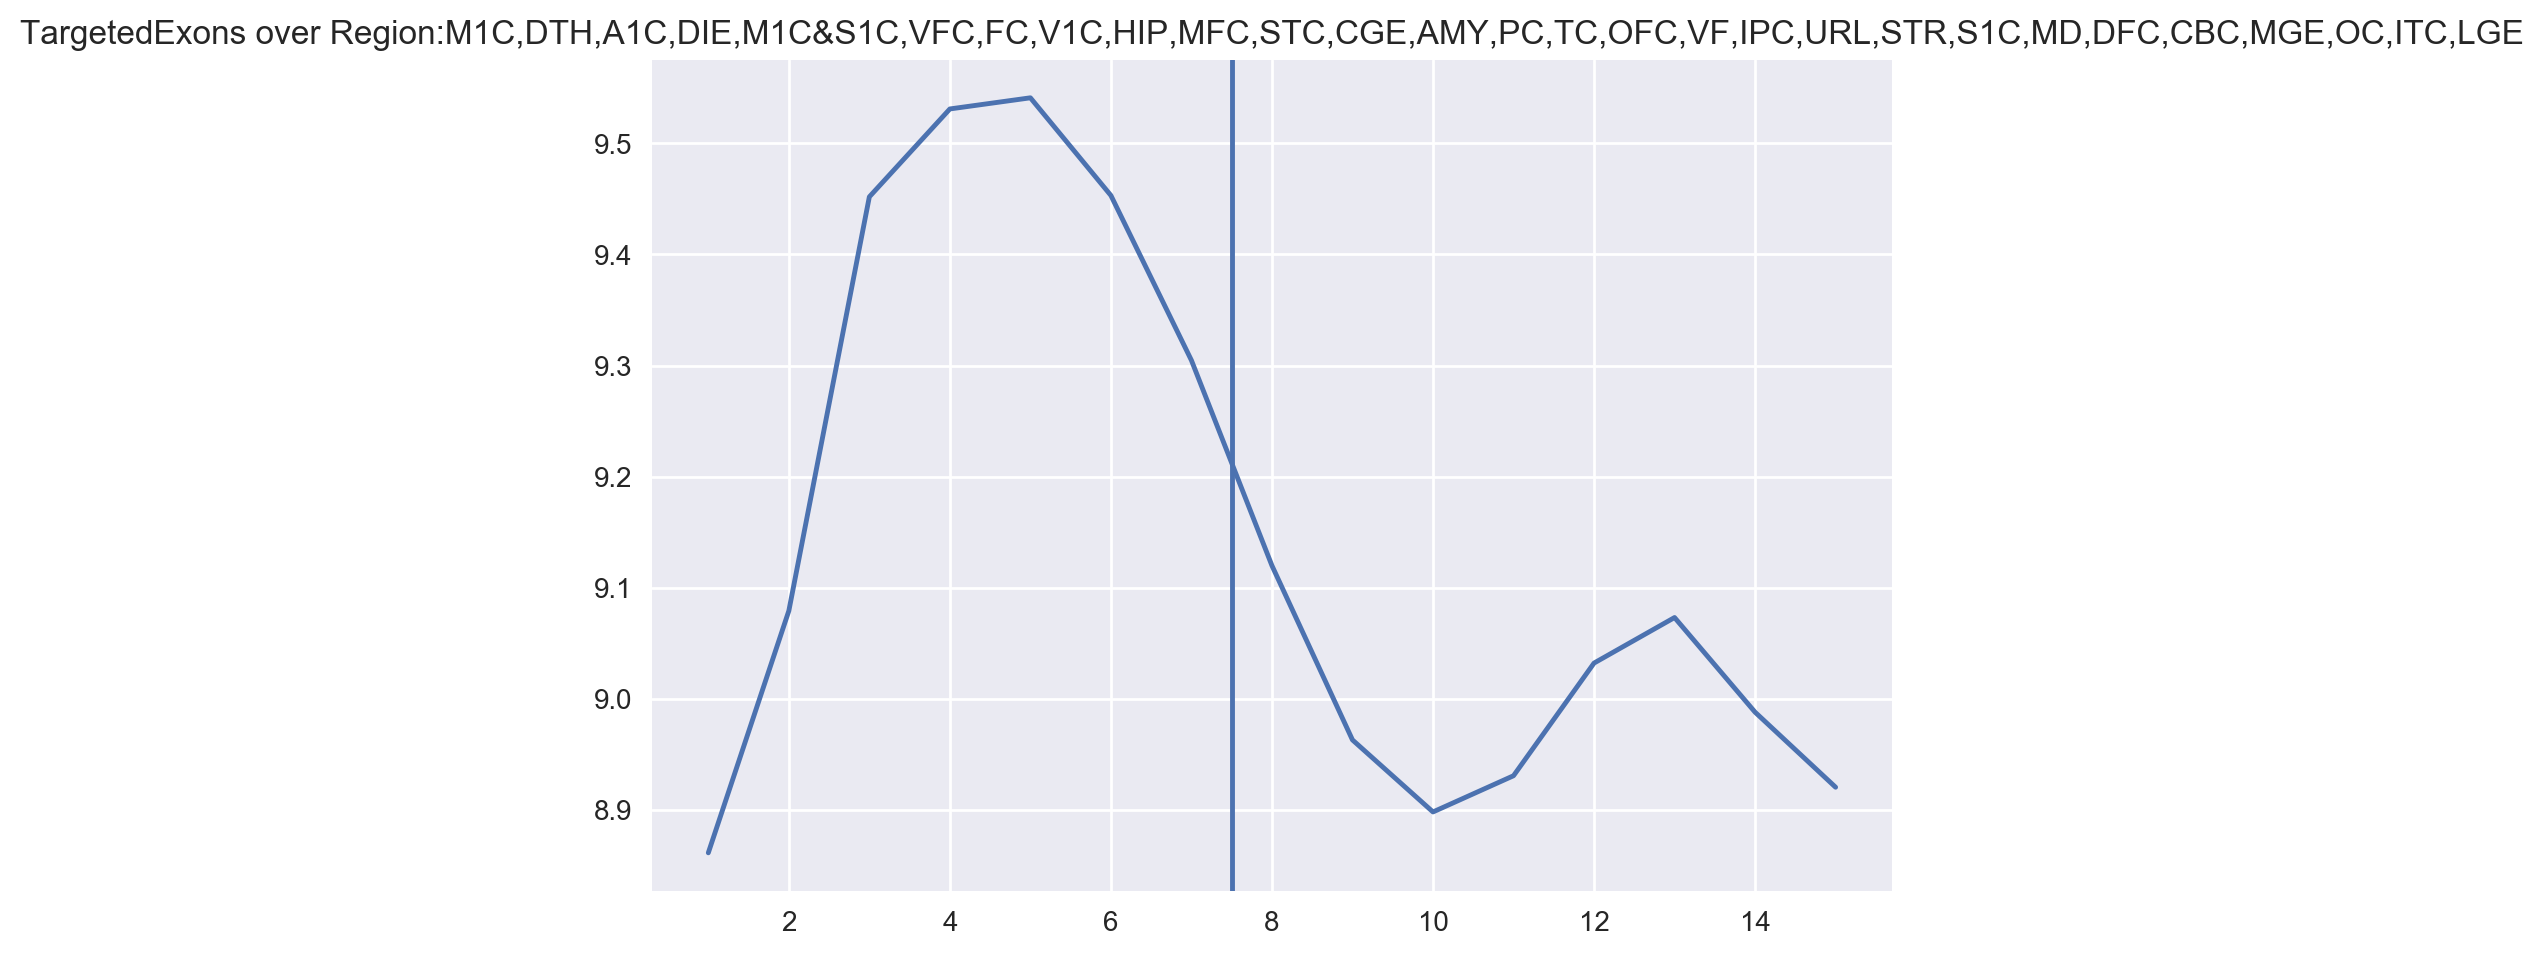

In [100]:
ins = HBT_DATA()
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, GeneDat)

12[8.5493062443438905, 9.6015500641025646, 0, 9.9912153571428561, 9.9940179120879122, 10.148461454849498, 9.3525825641025637, 9.4121732692307702, 9.4344081818181831, 8.9869167108753309, 9.0666582417582422, 9.2278266228893067, 9.4195845522388062, 9.28346761664565, 9.3173648317307691]


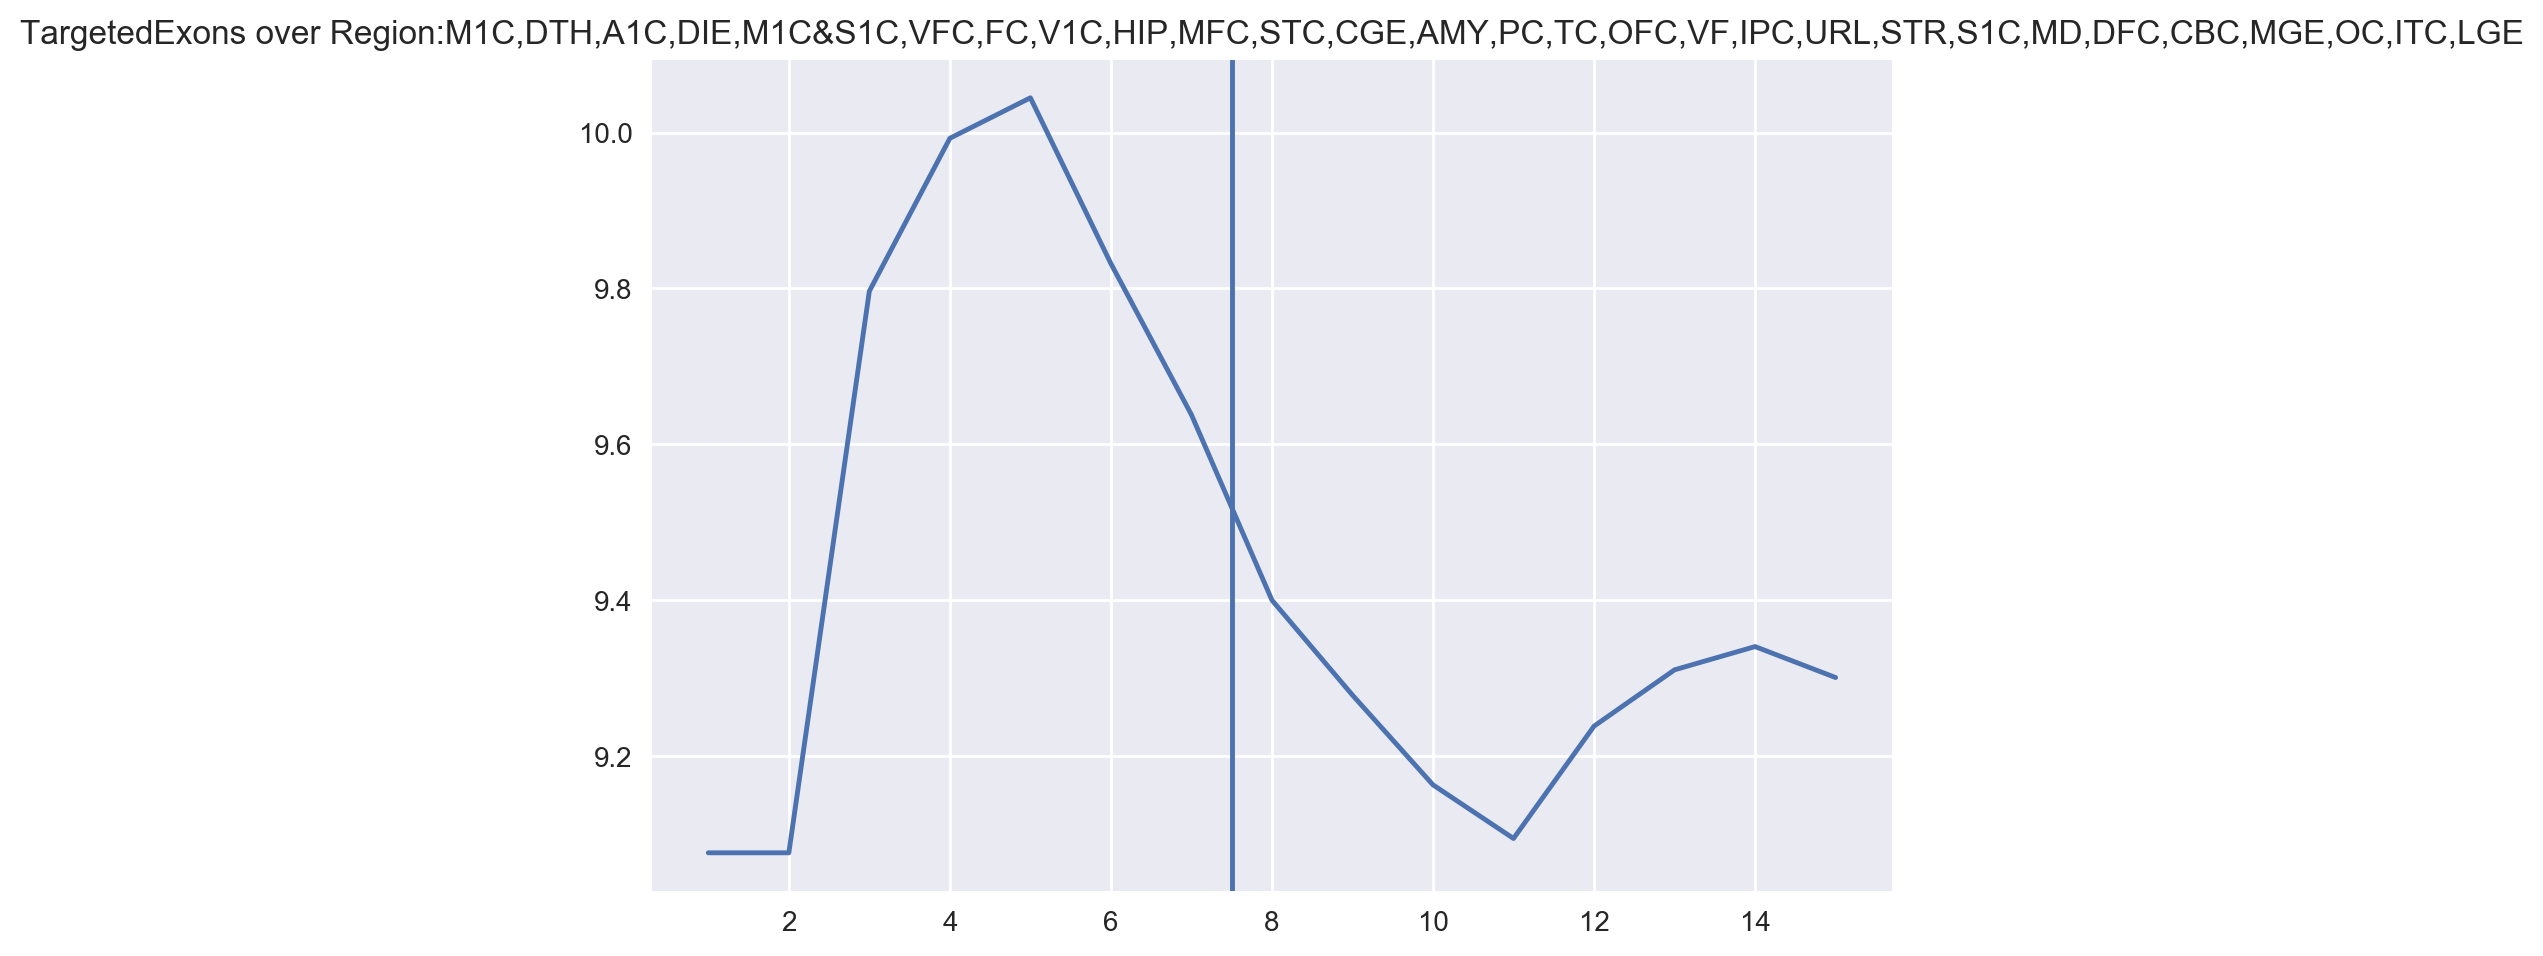

12[0, 0, 9.9821716129032243, 10.122341811414392, 9.9188978296703283, 9.9816128114842897, 9.8951695804195801, 0, 9.2873930608974362, 9.150509211538461, 9.3947261538461539, 9.5231284615384624, 9.3707611985688732, 9.2551473076923081, 8.9756644388398481]
Three 0 data at stage 1


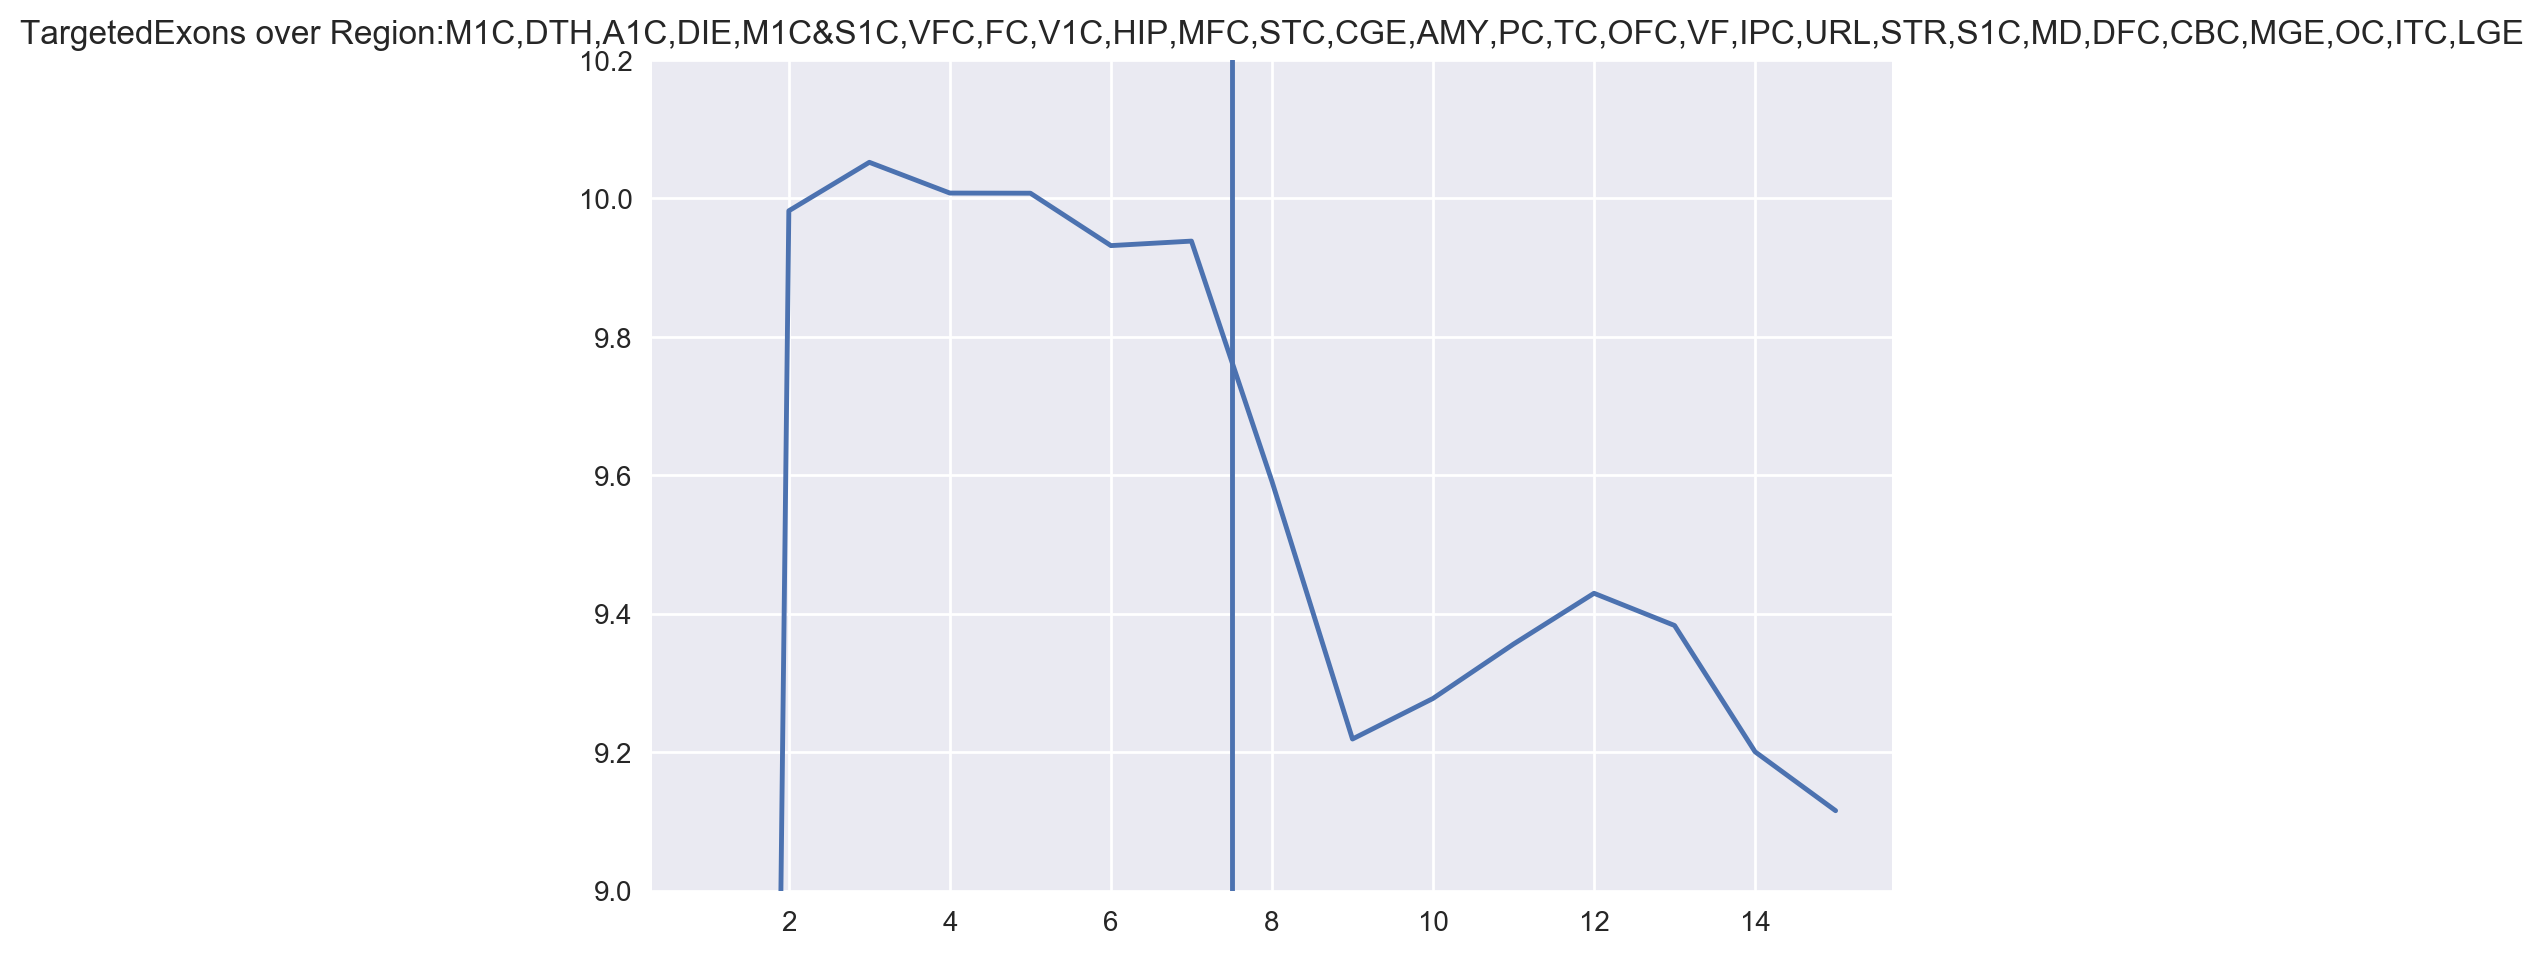

In [104]:
M_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="F"]
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, (GeneExp, Effect_GeneRow, M_bp_gene_col_meta))
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, (GeneExp, Effect_GeneRow, F_bp_gene_col_meta), ylim=(9, 10.2))